# Sh90/Kp90 EDA

For this seciton of the EDA, we need to gather all of the goals, assists, shots made, key passes made, minutes played as well as if the player had a clean sheet or not. Since all of the data was spread out through different CSV files, our goal will be to create different dataframes, clean them up and merge them all into one dataframe to be used for this portion of the EDA.



In [6]:
import pandas as pd
import numpy as np

In [7]:
elements = pd.read_csv("data clean/elements_clean.csv")
scrape = pd.read_csv("Player Info - Weekly/playerinfo_week1.csv")
api = pd.read_csv("PlayerGW API/player_gw_clean1.csv")
teams = pd.read_csv("data clean/teams_clean.csv")


In [8]:
api.head()

,id,fixture_id,stats.minutes,stats.goals_scored,stats.assists,stats.clean_sheets,stats.goals_conceded,stats.own_goals,stats.penalties_saved,stats.penalties_missed,...,stats.saves,stats.bonus,stats.bps,stats.influence,stats.creativity,stats.threat,stats.ict_index,stats.total_points,stats.in_dreamteam,gw
0,14,10,90,0,0,1,0,0,0,0,...,2,1,27,18.0,0.0,0.0,1.8,7,False,1
1,27,6,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,False,1
2,47,7,90,0,0,1,0,0,0,0,...,3,2,29,25.4,0.0,0.0,2.5,9,False,1
3,48,7,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,False,1
4,72,2,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,False,1


In [9]:
scrape.head()

,Unnamed: 0,id_x,name,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,id_y,Unnamed: 0.1.1.1.1,Team,First Name,Last Name,Pos,Apps,Min,G,A,Sh90,KP90,xG,xA
0,0,4,Ainsley Maitland-Niles,0,0,0,4,116,Arsenal,Ainsley,Maitland-Niles,D,1,90,0,1,0.0,1.0,0.00,0.44
1,1,5,Sokratis,1,1,1,5,113,Arsenal,Sokratis,,D,1,90,0,0,0.0,0.0,0.00,0.00
2,2,6,Nacho Monreal,2,2,2,6,114,Arsenal,Nacho,Monreal,D,1,90,0,0,0.0,1.0,0.00,0.34
3,3,11,Pierre-Emerick Aubameyang,3,3,3,11,109,Arsenal,Pierre-Emerick,Aubameyang,F,1,90,1,0,4.0,0.0,0.71,0.00
4,4,14,Bernd Leno,4,4,4,14,110,Arsenal,Bernd,Leno,GK,1,90,0,0,0.0,0.0,0.00,0.00


# Merging

We had to rename some of the varibles, to be able to merge with the others correctly

In [10]:
scrape = scrape.rename(columns ={"id_x": "id"})

scrape_c  = scrape[["id", "G", "A", "Sh90", "KP90", "Min"]]
scrape_c.head()

,id,G,A,Sh90,KP90,Min
0,4,0,1,0.0,1.0,90
1,5,0,0,0.0,0.0,90
2,6,0,0,0.0,1.0,90
3,11,1,0,4.0,0.0,90
4,14,0,0,0.0,0.0,90


In [11]:
api_c = api[["id", "stats.clean_sheets", "gw"]]
api_c.head()

,id,stats.clean_sheets,gw
0,14,1,1
1,27,0,1
2,47,1,1
3,48,0,1
4,72,0,1


The first type of mergine we used was an "outer" techinique, in order to mainten all of the contencts in both data sets, with out knocking out the players that were benched since they still could have participated in the game. Then filling in the value of the benched player with "0"s since the other dataset does not include their information as such.

In [12]:
merged_table = pd.merge(api_c ,scrape_c, on="id",how='outer').fillna(0)
merged_table.head()

,id,stats.clean_sheets,gw,G,A,Sh90,KP90,Min
0,14,1,1,0.0,0.0,0.0,0.0,90.0
1,27,0,1,0.0,0.0,0.0,0.0,0.0
2,47,1,1,0.0,0.0,0.0,0.0,90.0
3,48,0,1,0.0,0.0,0.0,0.0,0.0
4,72,0,1,0.0,0.0,0.0,0.0,0.0


This next portion add the team names of the player that partipated that week, since that information was not included in the above two data set, we had to import them from the `events_clean.csv`. Again merging them with an outer join to retain all of the infromation from both datasets.

In [13]:
temp = elements[["id", "team"]].rename(columns={"team":"team_id"})
temp2 = teams[["id", "name"]].rename(columns={"id":"team_id", "name":"team"})
merged_table2 = pd.merge(temp,temp2, on="team_id",how='outer')

merged_table2.head()

,id,team_id,team
0,1,1,Arsenal
1,2,1,Arsenal
2,3,1,Arsenal
3,4,1,Arsenal
4,5,1,Arsenal


This last portion will join both the datasets with the infromation on goals and the one with the teams names, this merge will be done with an inner merge since the infomraiton inside the team names datasets is larger and we do not want to ruin the integrity of the weekly player datasets.

In [14]:
merged_table3 = pd.merge(merged_table, merged_table2, on="id", how='inner')

merged_table3

,id,stats.clean_sheets,gw,G,A,Sh90,KP90,Min,team_id,team
0,14,1,1,0.0,0.0,0.0,0.0,90.0,1,Arsenal
1,27,0,1,0.0,0.0,0.0,0.0,0.0,2,Aston Villa
2,47,1,1,0.0,0.0,0.0,0.0,90.0,4,Brighton
3,48,0,1,0.0,0.0,0.0,0.0,0.0,4,Brighton
4,72,0,1,0.0,0.0,0.0,0.0,0.0,3,Bournemouth
...,...,...,...,...,...,...,...,...,...,...
521,504,0,1,0.0,0.0,0.0,0.0,4.0,1,Arsenal
522,509,0,1,0.0,0.0,0.0,0.0,0.0,17,Spurs
523,512,0,1,0.0,0.0,0.0,0.0,0.0,18,Watford
524,514,0,1,0.0,0.0,0.0,0.0,0.0,19,West Ham


### Merging the other Dataframes

In [15]:
for i in range(1,28):
    elements = pd.read_csv("data clean/elements_clean.csv")
    scrape = pd.read_csv("Player Info - Weekly/playerinfo_week"+ str(i) +".csv")
    api = pd.read_csv("PlayerGW API/player_gw_clean" + str(i) + ".csv")
    teams = pd.read_csv("data clean/teams_clean.csv")
    
    scrape = scrape.rename(columns ={"id_x": "id"})
    scrape_c  = scrape[["id", "G", "A", "Sh90", "KP90", "Min"]]
    
    api_c = api[["id", "stats.clean_sheets", "gw"]]
    
    merged_table = pd.merge(api_c ,scrape_c, on="id",how='outer')
    
    temp = elements[["id", "team"]].rename(columns={"team":"team_id"})
    
    temp2 = teams[["id", "name"]].rename(columns={"id":"team_id", "name":"team"})
    
    merged_table2 = pd.merge(temp,temp2, on="team_id",how='outer')
    
    merged_table3 = pd.merge(merged_table, merged_table2, on="id", how='inner').fillna(0)
    
    if(i == 1):
        result = merged_table3
    else:
        result = result.append(merged_table3, sort=False)
    merged_table3.to_csv("Sh90-Kp90/playerShKp_w" + str(i) + ".csv", index=False)

In [25]:
result = result.rename(columns={"stats.clean_sheets":"cleansheets", "G":"goals", "A":"assists", "Sh90":"sh90", "KP90":"kp90", "Min":"minutes"})
result["id"] = result["id"].astype(int)
result.to_csv("Sh90-Kp90/playerShKp_wtotal.csv", index=False)

## EDA

In [2]:
import pandas as pd
import numpy as np

In [3]:
shots = pd.read_csv("Sh90-Kp90/playerShKp_wtotal.csv")
shots

,id,cleansheets,gw,goals,assists,sh90,kp90,minutes,team_id,team
0,14,1.0,1.0,0.0,0.0,0.0,0.0,90.0,1,Arsenal
1,27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,Aston Villa
2,47,1.0,1.0,0.0,0.0,0.0,0.0,90.0,4,Brighton
3,48,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,Brighton
4,72,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,Bournemouth
...,...,...,...,...,...,...,...,...,...,...
15295,592,0.0,27.0,0.0,0.0,0.0,0.0,0.0,18,Watford
15296,613,0.0,27.0,0.0,0.0,1.0,0.0,90.0,2,Aston Villa
15297,622,0.0,27.0,0.0,0.0,0.0,0.0,0.0,15,Sheffield Utd
15298,623,0.0,27.0,0.0,0.0,0.0,0.0,0.0,2,Aston Villa


In [4]:
shots_avg = shots.groupby('id').mean()
shots_avg = shots_avg.loc[shots_avg['minutes'] > 0] 

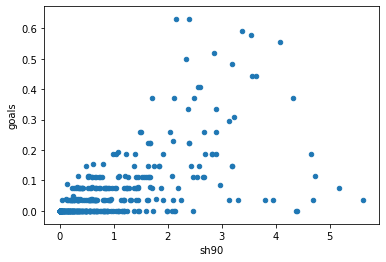

In [5]:
shots_avg = shots_avg.loc[shots_avg['sh90'] < 7 ]
shots_avg = shots_avg.loc[shots_avg['kp90'] < 5] 

shots_avg.plot.scatter(x = "sh90", y = "goals")


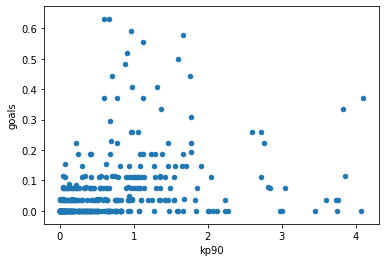

In [6]:
shots_avg.plot.scatter(x = "kp90", y = "goals")

In [7]:
test = pd.read_csv("data clean/elements_clean.csv")

In [8]:
test

,Unnamed: 0,code,element_type,event_points,first_name,form,id,now_cost,points_per_game,second_name,...,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index
0,0,69140,2,1,Shkodran,4.3,1,51,3.2,Mustafi,...,0,0,0,0,1,144,174.2,15.4,107.0,29.8
1,1,98745,2,1,Hector,5.0,2,54,3.4,Bellerin,...,0,2,0,0,3,113,116.6,37.7,38.0,19.4
2,2,111457,2,1,Sead,0.3,3,52,2.1,Kolasinac,...,0,3,0,0,1,222,190.0,157.3,67.0,41.2
3,3,154043,2,0,Ainsley,0.0,4,45,2.6,Maitland-Niles,...,0,3,1,0,3,216,261.8,155.4,37.0,44.9
4,4,39476,2,0,Sokratis,0.0,5,48,2.9,Papastathopoulos,...,0,5,0,0,5,286,431.6,31.8,106.0,57.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,619,245923,3,0,Luke,0.0,567,45,0.0,Cundle,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
620,620,179456,2,0,Oskar,0.0,587,40,0.0,Buur,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
621,621,232351,2,0,Ryan,0.0,607,40,0.0,Giles,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
622,622,428610,3,0,Bruno Andre,0.0,609,45,0.0,Cavaco Jordao,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


,Unnamed: 0,code,element_type,event_points,first_name,form,id,now_cost,points_per_game,second_name,...,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index
0,0,69140,2,1,Shkodran,4.3,1,51,3.2,Mustafi,...,0,0,0,0,1,144,174.2,15.4,107.0,29.8
1,1,98745,2,1,Hector,5.0,2,54,3.4,Bellerin,...,0,2,0,0,3,113,116.6,37.7,38.0,19.4
2,2,111457,2,1,Sead,0.3,3,52,2.1,Kolasinac,...,0,3,0,0,1,222,190.0,157.3,67.0,41.2
3,3,154043,2,0,Ainsley,0.0,4,45,2.6,Maitland-Niles,...,0,3,1,0,3,216,261.8,155.4,37.0,44.9
4,4,39476,2,0,Sokratis,0.0,5,48,2.9,Papastathopoulos,...,0,5,0,0,5,286,431.6,31.8,106.0,57.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,612,151589,3,3,Leander,2.0,420,44,2.5,Dendoncker,...,0,3,0,0,6,321,405.8,110.4,200.0,71.6
613,613,178876,2,0,Jesus,0.0,473,46,0.5,Vallejo Lazaro,...,0,1,0,0,0,22,35.6,7.0,0.0,4.3
614,614,209353,4,0,Patrick,0.0,487,55,1.9,Cutrone,...,0,0,0,0,0,69,85.2,35.6,155.0,27.5
615,615,247632,3,1,Pedro,1.7,528,50,2.0,Lomba Neto,...,0,2,0,0,0,133,155.8,171.5,198.0,52.4


,Team,Player,Pos,Apps,Min,G,NPG,A,Sh90,KP90,...,xGBuildup,xG90,NPxG90,xA90,xG90 + xA90,NPxG90 + xA90,xGChain90,xGBuildup90,Yellow Flag,Red Flag
0,Liverpool,Mohamed Salah,F,25,2175,15,12,6,3.97,1.82,...,6.76,0.63,0.54,0.28,0.91,0.82,0.96,0.28,1,0
1,Liverpool,Sadio Mane,F M,25,2000,13,13,6,2.56,1.75,...,4.89,0.55,0.55,0.21,0.77,0.77,0.87,0.22,2,0
2,Liverpool,Roberto Firmino,F M,28,2355,8,8,7,3.21,1.49,...,8.09,0.55,0.55,0.24,0.79,0.79,0.93,0.31,0,0
3,Liverpool,Virgil van Dijk,D,28,2520,4,4,0,0.79,0.11,...,9.83,0.06,0.06,0.01,0.07,0.07,0.36,0.35,1,0
4,Liverpool,Divock Origi,F,21,494,3,3,1,2.00,1.09,...,0.80,0.36,0.36,0.13,0.49,0.49,0.59,0.15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Norwich,Tom Trybull,M,14,1047,0,0,0,0.95,0.17,...,3.18,0.04,0.04,0.01,0.05,0.05,0.29,0.27,2,0
484,Norwich,Marco Stiepermann,M,19,950,0,0,0,1.71,0.95,...,3.09,0.11,0.11,0.08,0.19,0.19,0.44,0.29,4,0
485,Norwich,Christoph Zimmermann,D,15,1295,0,0,1,0.42,0.07,...,2.31,0.02,0.02,0.00,0.02,0.02,0.16,0.16,2,0
486,Norwich,Adam Idah,F,2,67,0,0,0,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
